In [1]:
pip install ema_workbench

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hdbscan
import sklearn.cluster as cluster
from ema_workbench.analysis import prim
%matplotlib inline

/work/06659/wmobley/minconda3/lib/python3.11/site-packages/ema_workbench/em_framework/evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
/work/06659/wmobley/minconda3/lib/python3.11/site-packages/ema_workbench/analysis/prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


In [3]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(7,5)})


In [4]:
df = pd.read_csv("Curated/HandCleaned/CodedTopics.csv")

In [5]:
print(len(df))

195


In [6]:
df = df.fillna(0)
surveyData = df[df.columns[1:-1]].values

In [7]:
surveyData

array([[1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [8]:
import umap
reducer  = umap.UMAP(
    n_neighbors=10,
    min_dist=0.0,
    n_components=2,
    random_state=42,
)

/work/06659/wmobley/minconda3/lib/python3.11/site-packages/umap/__init__.py:9: ImportWarning: Tensorflow not installed; ParametricUMAP will be unavailable
  warn(


In [9]:
embedding = reducer.fit_transform(surveyData)
embedding.shape


/work/06659/wmobley/minconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


(195, 2)

/work/06659/wmobley/minconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


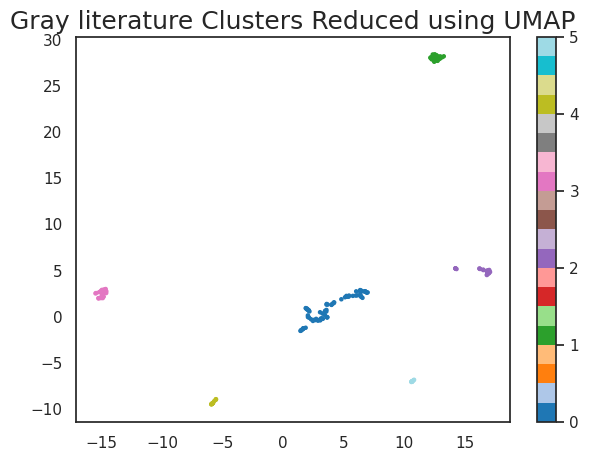

In [10]:
kmeans_labels = cluster.KMeans(n_clusters=6).fit_predict(embedding)
plt.scatter(embedding[:, 0], embedding[:, 1], c=kmeans_labels, s=5, cmap='tab20');

plt.colorbar()
plt.title('Gray literature Clusters Reduced using UMAP', fontsize=18);

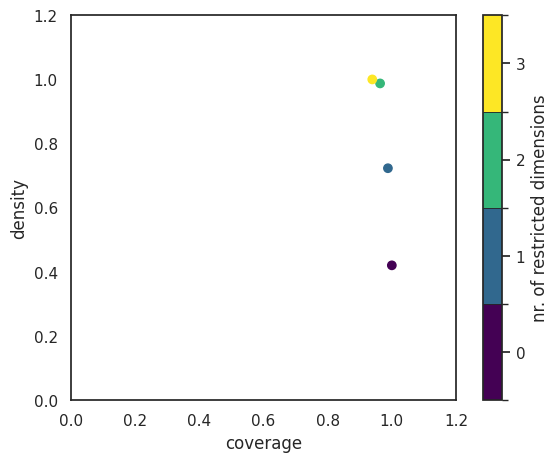

In [15]:
y = kmeans_labels==0


p = prim.Prim(df[df.columns[1:-1]], y, threshold=0.5)
    
box = p.find_box()
box.show_tradeoff()

plt.show()

In [16]:
box.inspect(2)

coverage    0.963415
density     0.987500
id          2.000000
mass        0.410256
mean        0.987500
res_dim     2.000000
Name: 2, dtype: float64

                   box 2                                 
                     min  max      qp value      qp value
not stage specific   0.0  0.5           NaN  2.918172e-20
federal policies     0.5  1.0  1.742947e-10           NaN



[None]

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1],
            c=[i for i, f in enumerate(df.file)] ,s=10, cmap='Spectral');

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=[i for i, f in enumerate(df.file)], cmap='Spectral', s=10)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(len(df))).set_ticks(np.arange(len(df)/3))
plt.title('UMAP projection of the Digits dataset', fontsize=24);